# Logistic Regression 
The short script aims to help getting acquainted with Logistic Regression using Scikit-learn and Tensorflow Keras API (Linear Regression as an extra section)

### Logistic Regression:
* Useful for binary classification problems (two classes).
* It models the probability of the default class.
* The logistic regression model uses the logistic function (also known as sigmoid) to squeeze the output of a linear equation between 0 and 1 which turn it into a probability.

For more info:
* https://christophm.github.io/interpretable-ml-book/logistic.html
* https://medium.com/@luwei.io/logistic-regression-with-keras-d75d640d175e
* https://machinelearningmastery.com/logistic-regression-for-machine-learning/
* https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789132212/1/ch01lvl1sec15/logistic-regression-with-keras
* https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

## Step 1: Setup

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()

# Tensorflow
import tensorflow as tf

## Step 2: Load and Visual the Data

In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn.datasets import load_breast_cancer

# Load in the data
data = load_breast_cancer()

In [3]:
# Features & Target Shape
print("Features:", data.data.shape)
print("Target:", data.target.shape)

Features: (569, 30)
Target: (569,)


In [4]:
# Features & Target Names
print("Features Name:", data.feature_names)
print("\nTarget Name:", data.target_names)

input_size = len(data.feature_names)

Features Name: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Name: ['malignant' 'benign']


## Step 3: Data Preprocessing

In [5]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# Split the dataset into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (398, 30)
X_test shape: (171, 30)


In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 4:  Logistic Regression using Scikit-learn 

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

# Initialized and train the model
SL_clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [8]:
# Evaluate Performance on the training set
SL_clf.score(X_train, y_train)

0.9899497487437185

### Use the trained model to make prediction

In [9]:
# Probability estimates: Probability of the sample for each class in the model
# Row 1: [probablity for class 0, probability for class 1]
SL_clf.predict_proba(X_test[:10])

array([[5.13852956e-04, 9.99486147e-01],
       [9.99720245e-01, 2.79754675e-04],
       [6.22863137e-01, 3.77136863e-01],
       [5.43165588e-01, 4.56834412e-01],
       [8.59286570e-01, 1.40713430e-01],
       [1.92284635e-03, 9.98077154e-01],
       [2.48345031e-02, 9.75165497e-01],
       [1.66261332e-03, 9.98337387e-01],
       [7.79639390e-02, 9.22036061e-01],
       [8.69623062e-06, 9.99991304e-01]])

In [10]:
# Predict class labels for samples in X (first 10)
SL_clf.predict(X_test[:10])

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [11]:
# Actual class label of the test samples (first 10)
y_test[:10]

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [12]:
# Evaluate Performance on test set
SL_clf.score(X_test, y_test)

0.9883040935672515

## Step 4:  Logistic Regression using Tensorflow with Keras API

In [13]:
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler

# Learning Rate Scheduler (reduce the learning rate in later iteration/epoch)
def scheduler(epoch, lr):
    if epoch >= 75:
        return 0.0001
    
    return 0.001

In [14]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

# Create the model
TF_clf = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(input_size,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
TF_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize the callback
callback= tf.keras.callbacks.LearningRateScheduler(scheduler)

# Train the model
TF_history = TF_clf.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[callback])

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 2s 4ms/sample - loss: 0.7002 - accuracy: 0.5528 - val_loss: 0.6830 - val_accuracy: 0.5673
Epoch 2/100
398/398 [==============================] - 0s 606us/sample - loss: 0.6306 - accuracy: 0.6583 - val_loss: 0.6219 - val_accuracy: 0.6316
Epoch 3/100
398/398 [==============================] - 0s 569us/sample - loss: 0.5721 - accuracy: 0.7161 - val_loss: 0.5694 - val_accuracy: 0.6901
Epoch 4/100
398/398 [==============================] - 0s 604us/sample - loss: 0.5221 - accuracy: 0.7613 - val_loss: 0.5249 - val_accuracy: 0.7368
Epoch 5/100
398/398 [==============================] - 0s 604us/sample - loss: 0.4807 - accuracy: 0.7965 - val_loss: 0.4865 - val_accuracy: 0.7602
Epoch 6/100
398/398 [==============================] - 0s 603us/sample - loss: 0.4449 - accuracy: 0.8342 - val_loss: 0.4542 - val_accuracy: 0.7895
Epoch 7/100
398/398 [==============================] - 0s 606us/sample - l

398/398 [==============================] - 0s 273us/sample - loss: 0.1232 - accuracy: 0.9673 - val_loss: 0.1462 - val_accuracy: 0.9649
Epoch 57/100
398/398 [==============================] - 0s 269us/sample - loss: 0.1219 - accuracy: 0.9673 - val_loss: 0.1449 - val_accuracy: 0.9649
Epoch 58/100
398/398 [==============================] - 0s 273us/sample - loss: 0.1207 - accuracy: 0.9673 - val_loss: 0.1436 - val_accuracy: 0.9649
Epoch 59/100
398/398 [==============================] - 0s 273us/sample - loss: 0.1195 - accuracy: 0.9673 - val_loss: 0.1423 - val_accuracy: 0.9649
Epoch 60/100
398/398 [==============================] - 0s 275us/sample - loss: 0.1183 - accuracy: 0.9673 - val_loss: 0.1412 - val_accuracy: 0.9649
Epoch 61/100
398/398 [==============================] - 0s 276us/sample - loss: 0.1172 - accuracy: 0.9673 - val_loss: 0.1400 - val_accuracy: 0.9649
Epoch 62/100
398/398 [==============================] - 0s 272us/sample - loss: 0.1161 - accuracy: 0.9673 - val_loss: 0.1389 

#### Note: Tensorflow for Linear Regression
Very similar to the logistic regression above except:
1. There will be no activation function in the final Dense layer
2. Use loss 'mse' for rather than metric 'accuracy' in logistic case (predicting value => rarely getting exact value)
3. Don't really need the 'validation_data' since we are trying to fit it as much as possible to our dataset

In [15]:
# Linear Regression Case

# TF_LRmodel = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(input_size,)),
#     tf.keras.layers.Dense(1)
# ])

# TF_LRmodel.compile(optimizer='sdg', loss=['mse'])
# TF_LRhistory = TF_LRmodel.fit(X_train, y_train, epochs=100, callbacks=[callback])

In [16]:
# Evaluate the model [loss, accuracy]
print("Train score:", TF_clf.evaluate(X_train, y_train))
print("Test score:", TF_clf.evaluate(X_test, y_test))

398/398 [==============================] - 0s 148us/sample - loss: 0.1018 - accuracy: 0.9673
Train score: [0.10184986073168079, 0.96733665]
171/171 [==============================] - 0s 167us/sample - loss: 0.1251 - accuracy: 0.9708
Test score: [0.12510709891542357, 0.9707602]


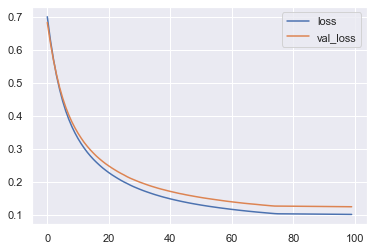

In [17]:
# Plot the Loss Learning Curve
plt.plot(TF_history.history['loss'], label='loss')
plt.plot(TF_history.history['val_loss'], label='val_loss')
plt.legend()

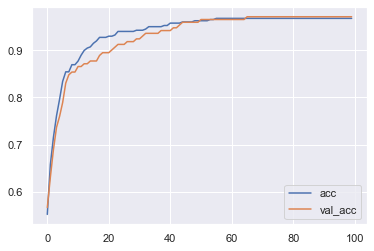

In [18]:
# Plot the Accuracy Learning Curve
plt.plot(TF_history.history['accuracy'], label='acc')
plt.plot(TF_history.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
# Make Samples prediction (sigmoid => probabilities p(y = 1 | x): probability of the default class)
predicted = TF_clf.predict(X_test[:10])
print(predicted)

[[0.99041873]
 [0.00590421]
 [0.45349172]
 [0.57642406]
 [0.20680642]
 [0.86462116]
 [0.94015604]
 [0.9569233 ]
 [0.82896084]
 [0.99707425]]


In [20]:
# Get the actual prediction (class label)
predicted = np.round(predicted).flatten()
print(predicted)

[1. 0. 0. 1. 0. 1. 1. 1. 1. 1.]


In [21]:
# Calculate the accuracy, compare it to evaluate() output
predicted_labels = TF_clf.predict(X_test).round().flatten()
print("Manually calculated accuracy:", np.mean(predicted_labels == y_test))
print("\nEvaluate output:", TF_clf.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9707602339181286
171/171 [==============================] - 0s 175us/sample - loss: 0.1251 - accuracy: 0.9708

Evaluate output: [0.12510709891542357, 0.9707602]


### Save and Load model
https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model

In [22]:
# Save the model
TF_clf.save('TF_LRclassifier.h5')

In [23]:
# Load the model and check with the test dataset
model = tf.keras.models.load_model('TF_LRclassifier.h5')
model.evaluate(X_test, y_test)

171/171 [==============================] - 0s 910us/sample - loss: 0.1251 - accuracy: 0.9708


[0.12510709891542357, 0.9707602]

## [EXTRA] Linear Regression with Tensorflow and Keras API
Proof of concept only! Still need more preprocessing

In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
from sklearn.datasets import load_diabetes

# Load the dataset
diabetes = load_diabetes()

# Create Dataframe for easy inspection of features and first few row of the data
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [25]:
# Features & Target Shape
print("Features:", diabetes.data.shape)
print("Target:", diabetes.target.shape)

Features: (442, 10)
Target: (442,)


In [26]:
# Split the dataset into train (90%) and test (10%)
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes.data, diabetes.target,
                                                                                        test_size=0.1)

print("X_train shape:", diabetes_X_train.shape)
print("X_test shape:", diabetes_X_test.shape)

X_train shape: (397, 10)
X_test shape: (45, 10)


In [27]:
# Use only the BMI feature (third column) rather than all 10 features (so we can plot them later)
reduced_diabetes_X_train = diabetes_X_train[:, np.newaxis, 2]
reduced_diabetes_X_test = diabetes_X_test[:, np.newaxis, 2]

In [28]:
# https://keras.io/api/models/model/
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Build the model using the functional API (only change in style, both works!)
i = Input(shape=(1,))
x = Dense(1)(i)
LR_model = Model(i, x)

# Compile the model
LR_model.compile(optimizer='sgd', loss='mse')

# Train the model
LR_history= LR_model.fit(reduced_diabetes_X_train, diabetes_y_train, epochs=100)

Train on 397 samples
Epoch 1/100
397/397 [==============================] - 1s 1ms/sample - loss: 24796.9056
Epoch 2/100
397/397 [==============================] - 0s 148us/sample - loss: 17001.8967
Epoch 3/100
397/397 [==============================] - 0s 143us/sample - loss: 12449.5066
Epoch 4/100
397/397 [==============================] - 0s 146us/sample - loss: 9792.3272
Epoch 5/100
397/397 [==============================] - 0s 146us/sample - loss: 8221.4339
Epoch 6/100
397/397 [==============================] - 0s 143us/sample - loss: 7213.4034
Epoch 7/100
397/397 [==============================] - 0s 153us/sample - loss: 6652.6643
Epoch 8/100
397/397 [==============================] - 0s 148us/sample - loss: 6326.3692
Epoch 9/100
397/397 [==============================] - 0s 146us/sample - loss: 6119.5930
Epoch 10/100
397/397 [==============================] - 0s 146us/sample - loss: 6020.9401
Epoch 11/100
397/397 [==============================] - 0s 156us/sample - loss: 5947.56

397/397 [==============================] - 0s 141us/sample - loss: 5662.2062
Epoch 92/100
397/397 [==============================] - 0s 141us/sample - loss: 5662.0627
Epoch 93/100
397/397 [==============================] - 0s 143us/sample - loss: 5656.2346
Epoch 94/100
397/397 [==============================] - 0s 143us/sample - loss: 5654.3979
Epoch 95/100
397/397 [==============================] - 0s 143us/sample - loss: 5653.9049
Epoch 96/100
397/397 [==============================] - 0s 143us/sample - loss: 5647.7236
Epoch 97/100
397/397 [==============================] - 0s 146us/sample - loss: 5649.0475
Epoch 98/100
397/397 [==============================] - 0s 143us/sample - loss: 5643.2475
Epoch 99/100
397/397 [==============================] - 0s 141us/sample - loss: 5644.7581
Epoch 100/100
397/397 [==============================] - 0s 146us/sample - loss: 5644.2437


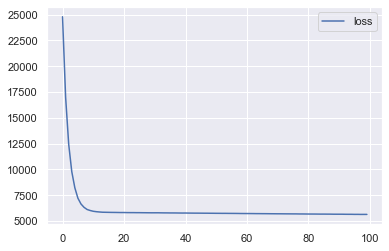

In [29]:
# Plot the Loss Learning Curve
plt.plot(LR_history.history['loss'], label='loss')
plt.legend()

In [30]:
# Checking the models Layers and Weights
print(LR_model.layers, "\n")
print(LR_model.layers[1].get_weights())

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001C01C138708>, <tensorflow.python.keras.layers.core.Dense object at 0x000001C1EF989D48>] 

[array([[55.04609]], dtype=float32), array([152.84894], dtype=float32)]


In [31]:
# The weight tell us the slope and intercept
slope = LR_model.layers[1].get_weights()[0][0,0]
intercept = LR_model.layers[1].get_weights()[1][0]

print("Equation: ", slope, "x +" , intercept)

Equation:  55.04609 x + 152.84894


In [32]:
# Testing out manual calculation vs prediction using the model

manual_calculation = slope * reduced_diabetes_X_test[0] + intercept
model_prediction = LR_model.predict(reduced_diabetes_X_test[0])

print("Manual calculation with slope and intercept: ", manual_calculation)
print("Model prediction: ", model_prediction)

Manual calculation with slope and intercept:  [152.3886658]
Model prediction:  [[152.38867]]


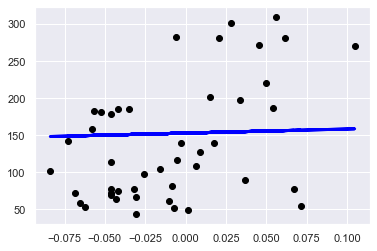

In [33]:
# Use the pretrained model to make prediction
diabetes_y_pred = LR_model.predict(reduced_diabetes_X_test)

# Plot the true value and fitted-line (predicted)
plt.scatter(reduced_diabetes_X_test, diabetes_y_test, color='black')
plt.plot(reduced_diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)